<a href="https://colab.research.google.com/github/icarocarmona/tech_challenge_f1/blob/main/notebooks/Analise_sobre_a_exporta%C3%A7%C3%A3o_de_Vinhos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv("https://raw.githubusercontent.com/icarocarmona/tech_challenge_f1/main/dados/trusted/dados_de_vinhos.csv", sep=";" )
dados.head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo
0,Outros(1),5132,3208,1970,Brasil,Espumantes,Exportação
1,Paraguai,415,152,1970,Brasil,Espumantes,Exportação
2,Bolívia,36,24,1970,Brasil,Espumantes,Exportação
3,Vietnã,0,0,1970,Brasil,Espumantes,Exportação
4,Líbano,0,0,1970,Brasil,Espumantes,Exportação


In [7]:
dados.value_counts('Tipo Vinho')


Tipo Vinho
Vinho De Mesa    6784
Uvas             6731
Sucos            6413
Espumantes       5353
dtype: int64

In [8]:
vinhos_de_mesa = dados[dados['Tipo Vinho'] == 'Vinho De Mesa'].reset_index(drop=True)
vinhos_de_mesa.head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo
0,Paraguai,89846,23980,1970,Brasil,Vinho De Mesa,Exportação
1,Colômbia,14205,6650,1970,Brasil,Vinho De Mesa,Exportação
2,Estados Unidos,11200,4200,1970,Brasil,Vinho De Mesa,Exportação
3,Tanzânia,13692,3562,1970,Brasil,Vinho De Mesa,Exportação
4,Libéria,4160,1190,1970,Brasil,Vinho De Mesa,Exportação


In [55]:
espumantes = dados[dados['Tipo Vinho'] == 'Espumantes'].reset_index(drop=True)
espumantes.head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo
0,Outros(1),5132,3208,1970,Brasil,Espumantes,Exportação
1,Paraguai,415,152,1970,Brasil,Espumantes,Exportação
2,Bolívia,36,24,1970,Brasil,Espumantes,Exportação
3,Vietnã,0,0,1970,Brasil,Espumantes,Exportação
4,Líbano,0,0,1970,Brasil,Espumantes,Exportação


In [9]:
vinhos_de_mesa.shape

(6784, 7)

In [10]:
vinhos_de_mesa[['Destino', 'Quantidade (L)', 'Ano']]

,Destino,Quantidade (L),Ano
0,Paraguai,89846,1970
1,Colômbia,14205,1970
2,Estados Unidos,11200,1970
3,Tanzânia,13692,1970
4,Libéria,4160,1970
...,...,...,...
6779,Nicaragua,0,2022
6780,Nova Caledônia,0,2022
6781,Costa Rica,0,2022
6782,Honduras,0,2022


In [44]:
top_10_paises = vinhos_de_mesa.groupby(by='Destino')['Quantidade (L)'].sum().sort_values(ascending=False).head(10).index
top_10_paises

Index(['Paraguai', 'Estados Unidos', 'Rússia', 'Japão', 'Angola',
       'Reino Unido', 'China', 'Espanha', 'Haiti', 'Países Baixos'],
      dtype='object', name='Destino')

In [47]:
vinhos_de_mesa_filtrado = vinhos_de_mesa[vinhos_de_mesa['Destino'].isin(top_10_paises)]
vinhos_de_mesa_filtrado.head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo
0,Paraguai,89846,23980,1970,Brasil,Vinho De Mesa,Exportação
2,Estados Unidos,11200,4200,1970,Brasil,Vinho De Mesa,Exportação
22,Países Baixos,0,0,1970,Brasil,Vinho De Mesa,Exportação
27,Japão,0,0,1970,Brasil,Vinho De Mesa,Exportação
58,Rússia,0,0,1970,Brasil,Vinho De Mesa,Exportação


In [57]:
espumantes_filtrados = espumantes[espumantes['Destino'].isin(top_10_paises)]
espumantes_filtrados.head()

,Destino,Quantidade (L),Valor U$,Ano,Origem,Tipo Vinho,Tipo
1,Paraguai,415,152,1970,Brasil,Espumantes,Exportação
18,Japão,0,0,1970,Brasil,Espumantes,Exportação
44,Reino Unido,0,0,1970,Brasil,Espumantes,Exportação
52,Angola,0,0,1970,Brasil,Espumantes,Exportação
55,China,0,0,1970,Brasil,Espumantes,Exportação


In [11]:
import seaborn as sns

<Axes: xlabel='Ano', ylabel='Quantidade (L)'>

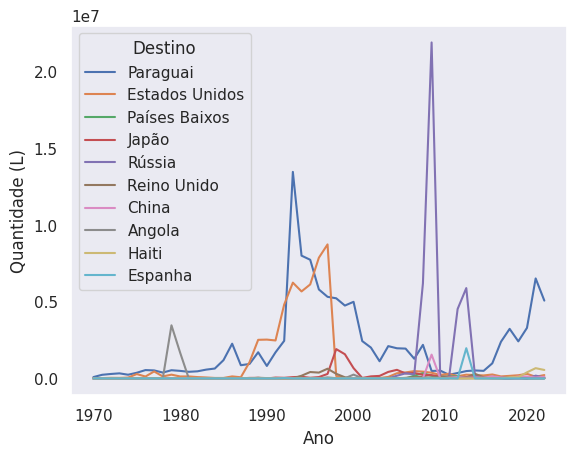

In [54]:
sns.set_theme(style='dark')

sns.lineplot(data=vinhos_de_mesa_filtrado,
            x='Ano', y= 'Quantidade (L)', hue='Destino')

<Axes: xlabel='Ano', ylabel='Quantidade (L)'>

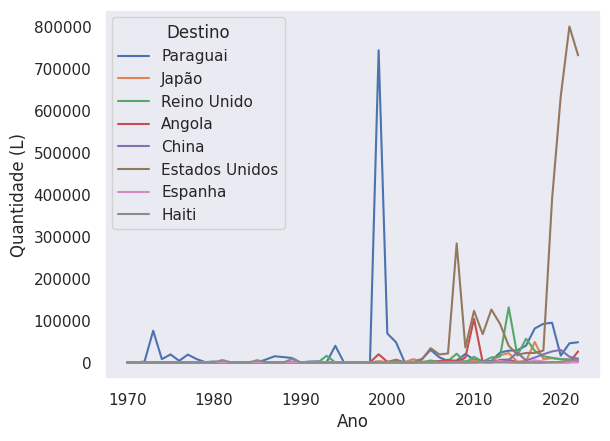

In [58]:
sns.lineplot(data=espumantes_filtrados,
            x='Ano', y= 'Quantidade (L)', hue='Destino')